## Dataset Information

This dataset contains 8732 labeled sound excerpts (<=4s) of urban sounds from 10 classes: 
<li>air_conditioner
<li>car_horn
<li>children_playing
<li>dog_bark
<li>drilling
<li>engine_idling
<li>gun_shot
<li>jackhammer
<li>siren
<li>street_music

## Mounting Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pwd

/content


## Unzip data

In [1]:
!unzip 'drive/MyDrive/Colab Notebooks/train.zip'

## Import modules

In [16]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import glob
import IPython.display as ipd
import random
%pylab inline

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


## Loading the dataset

In [6]:
df = pd.read_csv('Urban Sound Dataset.csv')
df.head()

,ID,Class
0,0,siren
1,1,street_music
2,2,drilling
3,3,siren
4,4,dog_bark


In [9]:
ipd.Audio('Train/1.wav')

## Exploratory Data Analysis

In [10]:
data, sampling_rate = librosa.load('Train/1.wav')

In [11]:
data

array([-0.09602016, -0.14303702,  0.05203498, ..., -0.01646687,
       -0.00915894,  0.09742922], dtype=float32)

In [12]:
sampling_rate

22050

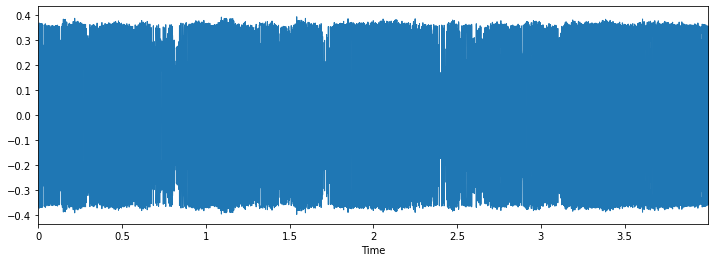

In [15]:
plt.figure(figsize=(12,4))
librosa.display.waveplot(data, sr=sampling_rate)

Class: dog_bark


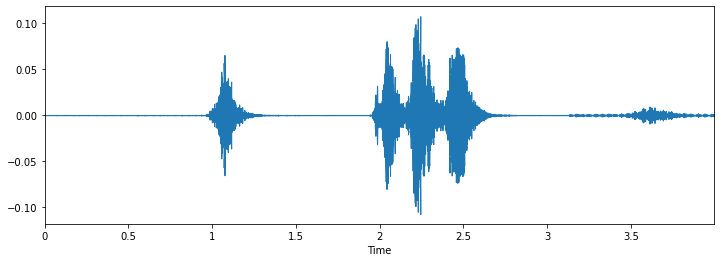

In [28]:
index = random.choice(df.index)

print('Class:', df['Class'][index])
data, sampling_rate = librosa.load('Train/'+str(df['ID'][index]) + '.wav')

plt.figure(figsize=(12,4))
librosa.display.waveplot(data, sr=sampling_rate)

Class: gun_shot


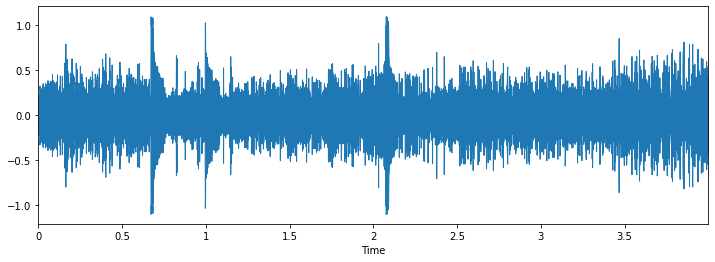

In [29]:
index = random.choice(df.index)

print('Class:', df['Class'][index])
data, sampling_rate = librosa.load('Train/'+str(df['ID'][index]) + '.wav')

plt.figure(figsize=(12,4))
librosa.display.waveplot(data, sr=sampling_rate)

Class: car_horn


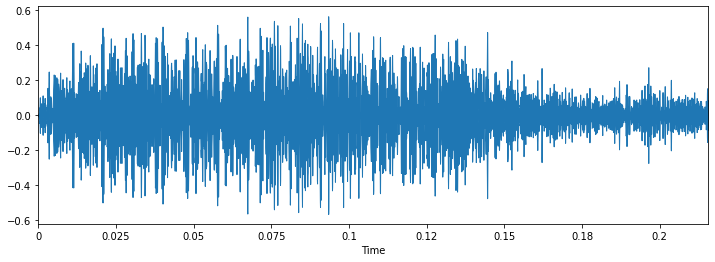

In [30]:
index = random.choice(df.index)

print('Class:', df['Class'][index])
data, sampling_rate = librosa.load('Train/'+str(df['ID'][index]) + '.wav')

plt.figure(figsize=(12,4))
librosa.display.waveplot(data, sr=sampling_rate)

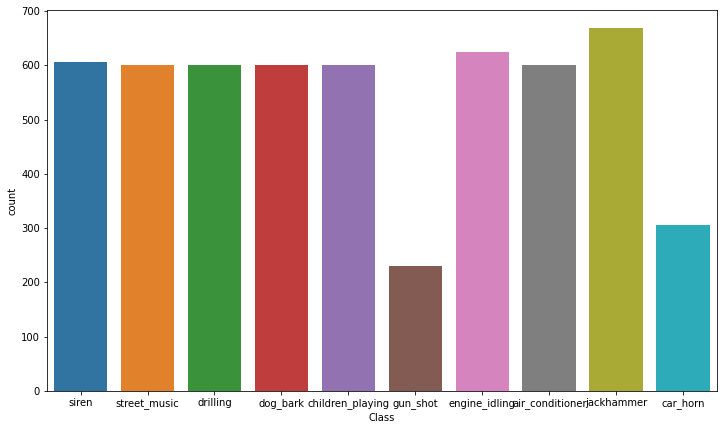

In [34]:
import seaborn as sns
plt.figure(figsize=(12,7))
sns.countplot(df['Class'])

## Input Split

In [39]:
import os

def parser(row):
  # path of the file
  file_name = os.path.join('Train', str(row.ID) + '.wav')
  # load the audio file
  x, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
  # extract features from the data
  mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=40).T, axis=0)

  feature = mfccs
  label = row.Class

  return [feature, label]

In [40]:
data = df.apply(parser, axis=1)
data.columns = ['feature','label']

In [42]:
data[0]

[array([-82.12358939, 139.50591598, -42.43086489,  24.82786139,
        -11.62076447,  23.49708426, -12.19458986,  25.89713885,
         -9.40527728,  21.21042898,  -7.36882138,  14.25433903,
         -8.67870015,   7.75023765, -10.1241154 ,   3.2581183 ,
        -11.35261914,   2.80096779,  -7.04601346,   3.91331351,
         -2.3349743 ,   2.01242254,  -2.79394367,   4.12927394,
         -1.62076864,   4.32620082,  -1.03440959,  -1.23297714,
         -3.11085341,   0.32044827,  -1.787786  ,   0.44295495,
         -1.79164752,  -0.76361758,  -1.24246428,  -0.27664012,
          0.65718559,  -0.50237115,  -2.60428533,  -1.05346291]), 'siren']

In [43]:
# input split
X = np.array(list(zip(*data))[0])
y = np.array(list(zip(*data))[1])

## Label encoder

In [44]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

le = LabelEncoder()
y = np_utils.to_categorical(le.fit_transform(y))

In [45]:
y.shape

(5435, 10)

In [46]:
y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

## Model Training

In [54]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

num_classes = 10

# model creation
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [55]:
# train the model
model.fit(X, y, batch_size=32, epochs=100, validation_split=0.25)

Epoch 1/100
128/128 [==============================] - 1s 6ms/step - loss: 10.9345 - accuracy: 0.1495 - val_loss: 2.0777 - val_accuracy: 0.2597
Epoch 2/100
128/128 [==============================] - 1s 5ms/step - loss: 2.1973 - accuracy: 0.2605 - val_loss: 1.8058 - val_accuracy: 0.4091
Epoch 3/100
128/128 [==============================] - 1s 5ms/step - loss: 1.9379 - accuracy: 0.3309 - val_loss: 1.6051 - val_accuracy: 0.4643
Epoch 4/100
128/128 [==============================] - 1s 5ms/step - loss: 1.7228 - accuracy: 0.3807 - val_loss: 1.4608 - val_accuracy: 0.5077
Epoch 5/100
128/128 [==============================] - 1s 5ms/step - loss: 1.5491 - accuracy: 0.4630 - val_loss: 1.3355 - val_accuracy: 0.5453
Epoch 6/100
128/128 [==============================] - 1s 5ms/step - loss: 1.4185 - accuracy: 0.4843 - val_loss: 1.2097 - val_accuracy: 0.5938
Epoch 7/100
128/128 [==============================] - 1s 5ms/step - loss: 1.3123 - accuracy: 0.5384 - val_loss: 1.1305 - val_accuracy: 0.635